# Sample Keras Linear Regressoin

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

import keras
import keras.backend as kb
import tensorflow as tf

### Generate Random Data

In [4]:
x_batch = np.linspace(0, 2, 100)
y_batch = 1.5 * x_batch + np.random.randn(*x_batch.shape) * 0.2 + 0.5

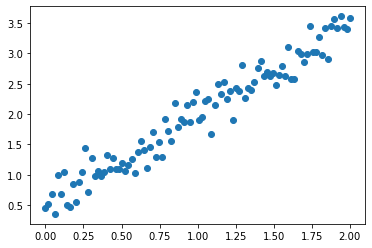

In [5]:
plt.scatter(x_batch, y_batch)

### Build the model

In [6]:
model = keras.Sequential([
    keras.layers.Dense(32, activation=tf.nn.relu, input_shape=[1]),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(1)
]
)

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                64        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 2,209
Trainable params: 2,209
Non-trainable params: 0
_________________________________________________________________


Fit the model

In [8]:
optimizer = tf.keras.optimizers.RMSprop(0.0099)

In [9]:
model.compile(loss='mean_squared_error',optimizer=optimizer)

In [10]:
model.fit(x_batch, y_batch, epochs=10)

Epoch 1/10
4/4 [==============================] - 0s 930us/step - loss: 1.8112
Epoch 2/10
4/4 [==============================] - 0s 815us/step - loss: 0.2251
Epoch 3/10
4/4 [==============================] - 0s 808us/step - loss: 0.1013
Epoch 4/10
4/4 [==============================] - 0s 844us/step - loss: 0.1671
Epoch 5/10
4/4 [==============================] - 0s 823us/step - loss: 0.1686
Epoch 6/10
4/4 [==============================] - 0s 819us/step - loss: 0.0494
Epoch 7/10
4/4 [==============================] - 0s 831us/step - loss: 0.0489
Epoch 8/10
4/4 [==============================] - 0s 891us/step - loss: 0.0789
Epoch 9/10
4/4 [==============================] - 0s 821us/step - loss: 0.1538
Epoch 10/10
4/4 [==============================] - 0s 817us/step - loss: 0.1411


### Predict Model

In [16]:
x=1.3
y=model.predict([x])
print(y)

[[1.900134]]


In [13]:
x_batch[0:3]

array([0.        , 0.02020202, 0.04040404])

In [14]:
model.predict([x_batch[0:3]])

array([[0.45443738],
       [0.47652823],
       [0.49907   ]], dtype=float32)

In [47]:
model.predict([2.0, 1.3])

array([[2.876426 ],
       [2.0326824]], dtype=float32)

## Save model

Helper function

In [18]:
## Set the project repo 
def ProjectRepo(path):
    ProjectRepo = os.popen('bdvcli --get cluster.project_repo').read().rstrip()
    print(ProjectRepo)
    return ProjectRepo + '/' + path 

In [19]:
# Save model
print("Saving model")
model.save(ProjectRepo('models/Keras_Sample/db_remote.h5'))

Saving model
/bd-fs-mnt/project_repo


Prepare for TF Serving

In [20]:
# Prepare TF Serving
print("Preparing for TF Serving")
MODEL_VERSION = 1
tf.keras.backend.set_learning_phase(0) 
model = tf.keras.models.load_model(ProjectRepo('models/Keras_Sample/db_remote.h5'))
export_path = ProjectRepo('models/Keras_Sample/' + str(MODEL_VERSION))
tf.keras.models.save_model(model, export_path)

Preparing for TF Serving
Instructions for updating:
Simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
/bd-fs-mnt/project_repo
/bd-fs-mnt/project_repo
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /bd-fs-mnt/project_repo/models/Keras_Sample/1/assets
